### Feature Selection Based on Mutual Information(Entropy)Gain for Classification & Regression.
Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in. Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.
#### Irrelevant or partially relevant features can negatively impact model performance.

#### What is Mutual Information ?

The elimination process aims to reduce the size of the input feature set and at the same time to retain the class
Discriminatory information for classification problems.

Mutual information(MI) is a measure of the amount information between two random variables in symmetric and non-negetive.
and,it could be zero if and only if variable are independed.
Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.
A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

Feature filtering method that is univarient method does not give ganrantee to get the better accuracy.
Since in univarient method features importants are calculated indivisualy instaed of in a group.
So,sometimes what happen top best performing features doesn't perform well as grouping of some other method.

Accuracy methods features importance are calculated individually instead of in a group so sometimes 
what happened at top 10 best-performing features doesn't perform well as grouping of some other methods so what happens in the filtering methods sometimes we enter into by selecting suboptimal features but filtering are univariate methods are quite fast and that those can be used as a screening and sometimes you might get a better accuracy but most of the time you would get a better the training time that introduced training time after selecting some particular feature set 
so by keeping those things in mind you should read this lessons and one more thing in for the lessons I was talking about the wrapper method as well as the imported methods which are better than the filter methods but whose methods are very costly 
go ahead and I'll tell you to take you through this lessons for the first will be talking about are the classification problem in which shall be working on sent Android data set then first
I'll remove the constant and duplicate features and then 
after that I will remove all calculate the mutual information and 
then based on the mutual information Sal select top 10 top 10 percentage and percentile of the features which is the 23 features and then I build model and
then finally I'll train it and after that I will work on regression problem which is the best and data regression problem using Boston data set and using mutual information Sal calculate the in mutual information gain on the individual features and 
then finally I select top 9 features which are to be stopped 9 features 
after selecting the staff top 9 features and I calculate the performance compare the performance of the selected features and the overall features 
so this is all in this lesson.

### Classification Problem Using Mutual Information Gain.

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression,SelectPercentile,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold

In [90]:
data = pd.read_csv('santander-train.csv',nrows=2000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [91]:
x = data.drop(labels='TARGET',axis=1)
y  = data['TARGET']

x.shape,y.shape

((2000, 370), (2000,))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=0,stratify=y)

In [92]:
x_train.shape,x_test.shape

((16000, 370), (4000, 370))

Remove the constant,quaisi constant,duplicated 

In [94]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(x_train)
x_train_filter=constant_filter.transform(x_train)
x_test_filter= constant_filter.transform(x_test)

x_train_filter.shape,x_test_filter.shape

((16000, 245), (4000, 245))

Dupllicated features Removal

In [96]:
x_train_T = x_train_filter.T
x_test_T  = x_test_filter.T
x_train_T = pd.DataFrame(x_train_T)
X_test_T = pd.DataFrame(x_test_T)

In [98]:
duplicated_features = x_train_T.duplicated()

In [99]:
keep_them = [not index for index in duplicated_features]

In [100]:
x_train_unique = x_train_T[keep_them].T
x_test_unique  = x_test_T[keep_them].T

In [101]:
x_train_unique.shape,x_test_unique.shape

((16000, 227), (4000, 227))

calculated mutual information

In [103]:
mi = mutual_info_classif(x_train_unique,y_train)
len(mi)

227

In [104]:
mi = pd.Series(mi)
mi.index = x_train_unique.columns
mi.sort_values(ascending= False,inplace = True)

If we see the graph here we can see that the few of the features are contributing the more information gain(individualy) than the others and only 60 to 70 % features are added the contribution in mutual inforamtion gain
and those who are contributing the more inforation which are very important in this kind of classifiction.
    We are going to remove those features which minutly contributing any information individually so for that we are going to select some k best or the Selectpercentile to get the those who are contributing the more information than the others.

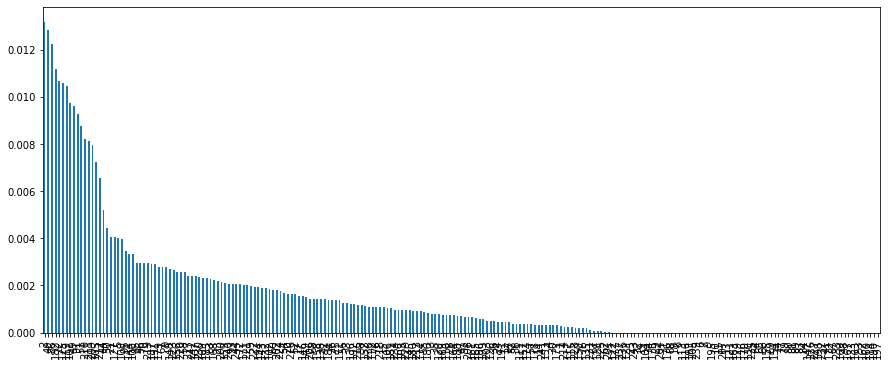

In [109]:
mi.plot.bar(figsize = (15,6))

In [112]:
sel = SelectPercentile(mutual_info_classif,percentile=10).fit(x_train_unique,y_train)
x_train_unique.columns[sel.get_support()]

Int64Index([  2,  22,  40,  44,  46,  49,  51,  52,  85,  86,  91,  95, 101,
            105, 119, 125, 127, 182, 209, 210, 211, 212, 223],
           dtype='int64')

In [113]:
len(x_train_unique.columns[sel.get_support()])

23

In [116]:
x_train_mi = sel.transform(x_train_unique)
x_test_mi = sel.transform(x_test_unique)

x_train_mi.shape,x_test_mi.shape

((16000, 23), (4000, 23))

In [117]:
x_train_mi.shape,x_test_mi.shape

((16000, 23), (4000, 23))

In [ ]:
#build a classifier 

In [119]:
def randomforest(x_train,x_test,y_train,y_test):
    clf = RandomForestClassifier(random_state=0,n_estimators=1000,n_jobs=-1)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy :',accuracy_score(y_test,y_pred))

In [120]:
%%time
randomforest(x_train_mi,x_test_mi,y_train,y_test)

Accuracy : 0.95775
Wall time: 10.2 s


In [124]:
%%time 
randomforest(x_train,x_test,y_train,y_test)

Accuracy : 0.959
Wall time: 26.2 s


From the above we can say that the features selection method does not make any impace of the accuracy but it impacct the compuational time from the we can say easily.

In [ ]:
#this is it can be done with the help mutual information classifier

In [121]:
help(sel)
#this is how we can get the whole about it

Help on SelectPercentile in module sklearn.feature_selection.univariate_selection object:

class SelectPercentile(_BaseFilter)
 |  SelectPercentile(score_func=<function f_classif at 0x0E8D3108>, percentile=10)
 |  
 |  Select features according to a percentile of the highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See also"). The default function only
 |      works with classification tasks.
 |  
 |  percentile : int, optional, default=10
 |      Percent of features to keep.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like, shape=(n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like, shape=(n_features,)
 |      p-values of feature scores, None if `score_func` returned only scores.
 |

### Mutual Information Gain In Regression.

In [157]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

boston = datasets.load_boston()

In [158]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Here we can see that there is 13 attributes (columns)and 506 instances(rows)

In [159]:
x=pd.DataFrame(data=boston.data,columns=boston.feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [160]:
y=boston.target

In [161]:
x_train,x_test,y_train,_y_test = train_test_split(x,y,train_size=.80,random_state=0)

In [162]:
mi=mutual_info_regression(x_train,y_train)
mi =pd.Series(mi)
mi.index = x_train.columns
mi.sort_values(ascending =False,inplace = True)

In [163]:
mi

LSTAT      0.680237
RM         0.559390
INDUS      0.509243
PTRATIO    0.483855
NOX        0.451783
TAX        0.397814
CRIM       0.362707
AGE        0.344705
DIS        0.323226
RAD        0.209366
ZN         0.188962
B          0.151204
CHAS       0.016339
dtype: float64

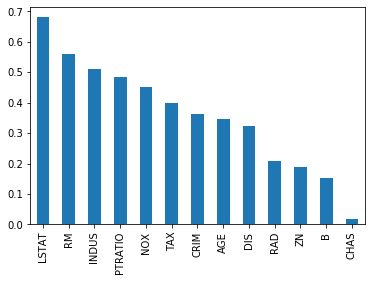

In [164]:
mi.plot.bar()

If we see the above plot in that the execpt one bar the other contributing more information and for that we can thses features
are really important and the we are selecting the top 9 featues those who really contributing the imformation as expected.

In [165]:
sel = SelectKBest(mutual_info_regression,k=9).fit(x_train,y_train)
x_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [166]:
len(x_train.columns[sel.get_support()])

9

In [167]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

In [169]:
np.sqrt(mean_squared_error(y_test,y_train))

ValueError: Found input variables with inconsistent numbers of samples: [4000, 404]